In [2]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [3]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),     # Step 1: Handle missing values
    ('scaler', StandardScaler()),                    # Step 2: Feature scaling
    ('classifier', LogisticRegression())             # Step 3: Classifier
])

# Fit and predict
pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)

print("Accuracy:", accuracy)


Accuracy: 1.0


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load data
data = load_iris()
X = data.data
y = data.target

# Create model
model = LogisticRegression(max_iter=200)

# 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Show scores
print("Accuracy for each fold:", scores)
print("Average accuracy:", scores.mean())


Accuracy for each fold: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average accuracy: 0.9733333333333334


In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Define a pipeline with scaling and logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=200))
])

# Create Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')

# Output results
print("Accuracy for each fold:", scores)
print("Average accuracy:", scores.mean())


Accuracy for each fold: [1.         0.96666667 0.9        1.         0.9       ]
Average accuracy: 0.9533333333333334


In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load data
X, y = load_iris(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = SVC()

# Define hyperparameters to try
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search
grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9583333333333334


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = SVC()

# 1. GridSearchCV
grid_params = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid = GridSearchCV(model, grid_params, cv=3)
grid.fit(X_train, y_train)
print("Best GridSearchCV:", grid.best_params_)

# 2. RandomizedSearchCV
from scipy.stats import uniform
random_params = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}
random_search = RandomizedSearchCV(model, random_params, n_iter=5, cv=3, random_state=42)
random_search.fit(X_train, y_train)
print("Best RandomizedSearchCV:", random_search.best_params_)


Best GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best RandomizedSearchCV: {'C': np.float64(5.908361216819946), 'gamma': 'auto', 'kernel': 'linear'}


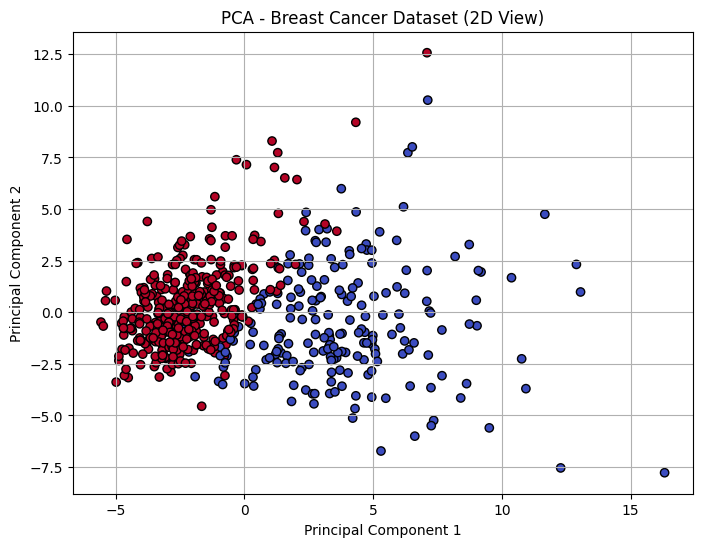

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Scale features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Plot the reduced data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Breast Cancer Dataset (2D View)")
plt.grid(True)
plt.show()
